In [13]:
import pandas as pd
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import sklearn.tree as tree
import matplotlib.pyplot as plt

In [14]:
df_teams=pd.read_csv('final_data.csv')

df_teams = df_teams[df_teams['year'] != 1]
df_teams.drop(columns=['tmID'], inplace=True)
df_teams.head()


,year,rank,playoff,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,o_oreb,...,PostDQ,height,weight,award_count,won,lost,post_wins,post_losses,W,L
16,2,8.0,1,812.0,1903.0,431.0,577.0,131.0,386.0,305.0,...,0.0,71.500000,164.416667,0.0,8.0,24.0,0.0,0.0,0.0,0.0
17,2,2.0,1,809.0,1828.0,426.0,570.0,141.0,407.0,331.0,...,0.0,71.866667,170.933333,0.0,17.0,15.0,3.0,3.0,3.0,3.0
18,2,5.0,0,868.0,1980.0,519.0,699.0,76.0,273.0,341.0,...,0.0,71.833333,164.583333,0.0,14.0,18.0,0.0,0.0,0.0,0.0
19,2,2.0,1,891.0,1894.0,521.0,634.0,172.0,491.0,273.0,...,0.0,71.909091,167.636364,1.0,27.0,5.0,6.0,0.0,6.0,0.0
20,2,7.0,0,796.0,1838.0,428.0,569.0,193.0,521.0,285.0,...,0.0,71.923077,166.769231,0.0,9.0,23.0,0.0,0.0,0.0,0.0


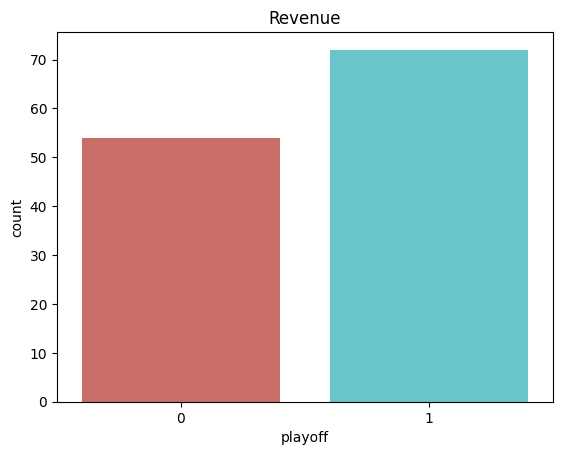

In [15]:
sb.countplot(x='playoff',data=df_teams, palette='hls')
plt.title("Revenue")
plt.show()

In [16]:

def train_evaluate_decision_tree_graph(model, data, target_col="playoff"):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    years_tested = []

    # Sort the data by the "year" column
    data = data.sort_values(by="year")

    years = sorted(data["year"].unique())

    for year in years[2:]:
       
        # Split the data into training and test sets
        train_data = data[data["year"] < year ]
        test_data = data[data["year"] == year ]

        X_train = train_data.drop(target_col, axis=1)
        y_train = train_data[target_col]
        X_test = test_data.drop(target_col, axis=1)
        y_test = test_data[target_col]

        # Create and train the decision tree model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy and precision
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        years_tested.append(year)

    return years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores


In [17]:

def train_evaluate_decision_tree(model, data, target_col="playoff"):
    # Sort the data by the "year" column
    data = data.sort_values(by="year")
       
    # Define the training and testing split ratios
    train_ratio = 0.7
    train_data_year = int(train_ratio * len(data["year"].unique()))
    print(train_data_year)

    train_data = data[data["year"] < train_data_year]
    test_data = data[data["year"] >= train_data_year]
    print(train_data.head())

    X_train = train_data.drop(target_col, axis=1)
    y_train = train_data[target_col]
    X_test = test_data.drop(target_col, axis=1)
    y_test = test_data[target_col]

    # Create and train the decision tree model
    model.fit(X_train, y_train)
    feature_names = X_train.columns

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy and precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [18]:
model = DecisionTreeClassifier()
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree_graph(model, df_teams)
accuracy, precision, recall, f1 = train_evaluate_decision_tree(model, df_teams)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")


6
    year  rank  playoff  o_fgm   o_fga  o_ftm  o_fta  o_3pm  o_3pa  o_oreb   
16     2   8.0        1  812.0  1903.0  431.0  577.0  131.0  386.0   305.0  \
31     2   4.0        0  832.0  1813.0  403.0  578.0  109.0  335.0   300.0   
30     2   5.0        1  858.0  1896.0  609.0  790.0   88.0  262.0   348.0   
29     2   8.0        0  667.0  1740.0  379.0  561.0  109.0  364.0   256.0   
28     2   3.0        1  876.0  1993.0  449.0  650.0  142.0  459.0   388.0   

    ...    PostDQ     height      weight  award_count   won  lost  post_wins   
16  ...  0.000000  71.500000  164.416667          0.0   8.0  24.0        0.0  \
31  ...  0.000000  72.285714  166.357143          0.0  14.0  18.0        0.0   
30  ...  0.000000  66.416667  168.333333          0.0  18.0  14.0        0.0   
29  ...  0.000000  73.153846  167.153846          0.0   6.0  26.0        0.0   
28  ...  1.083333  71.769231  162.923077          0.0  21.0  11.0        0.0   

    post_losses    W    L  
16          0.0  0.0

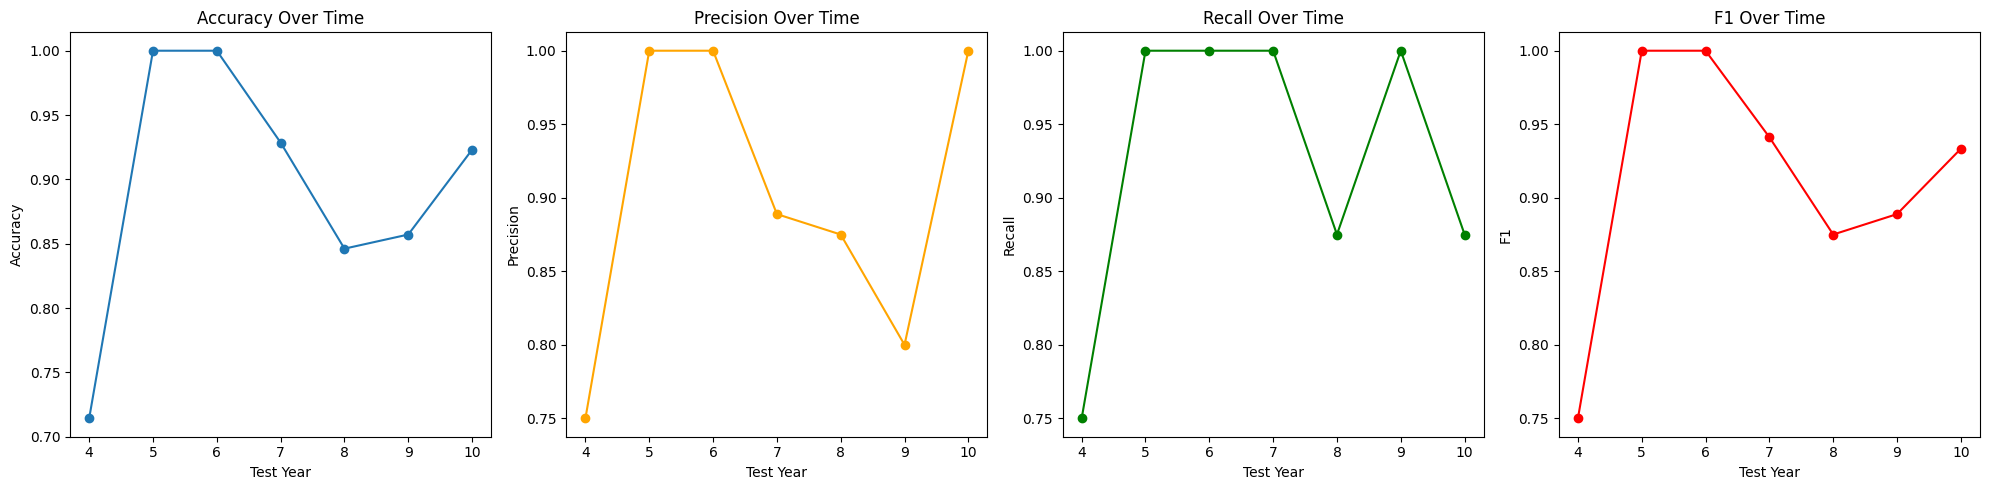

In [20]:
# Create a graph to plot accuracy and precision over time
plt.figure(figsize=(20, 5))

# Plot accuracy
plt.subplot(1, 4, 1)
plt.plot(years_tested, accuracy_scores, marker='o')
plt.title('Accuracy Over Time')
plt.xlabel('Test Year')
plt.ylabel('Accuracy')

# Plot precision
plt.subplot(1, 4, 2)
plt.plot(years_tested, precision_scores, marker='o', color='orange')
plt.title('Precision Over Time')
plt.xlabel('Test Year')
plt.ylabel('Precision')

# Plot recall
plt.subplot(1, 4, 3)
plt.plot(years_tested, recall_scores, marker='o', color='green')
plt.title('Recall Over Time')
plt.xlabel('Test Year')
plt.ylabel('Recall')

# Plot f1
plt.subplot(1, 4, 4)
plt.plot(years_tested, f1_scores, marker='o', color='red')
plt.title('F1 Over Time')
plt.xlabel('Test Year')
plt.ylabel('F1')


plt.tight_layout()
plt.show()